In [1]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.decomposition import PCA

Going to start looking at ride_id to see correlations between ride distance and duration and prime time

In [2]:
ride_id = pd.read_csv("ride_ids.csv")

In [3]:
ride_id

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100
5,002be0ffdc997bd5c50703158b7c2491,03d6b9d80b8a96135cb9b25178e9e203,4832,917,100
6,002be0ffdc997bd5c50703158b7c2491,04053c0ed21761e07f0b869cab5b7dd0,1575,347,0
7,002be0ffdc997bd5c50703158b7c2491,0534d432e0186625f623aaee57af98be,3056,687,25
8,002be0ffdc997bd5c50703158b7c2491,053a1621c0affcd2b9c517af5c2bc843,3940,1143,75
9,002be0ffdc997bd5c50703158b7c2491,066e92c52f59486de56cd7b8716a4ca6,3957,868,50


driver id, ride id, ride_distance, ride_duration, ride_prime_time, total money, response time 

Base Fare
Cost per Mile Cost per Minute Service Fee Minimum Fare Maximum Fare
Submission instructions:
$2.00 $1.15 $0.22 $1.75

In [4]:
ride_id["ride_cost"] = ride_id['ride_distance'] * 1.15 * 0.000621371 + ride_id["ride_duration"] * 0.22 / 60 + 3.75
ride_id[ride_id["ride_cost"] < 5] = 5
ride_id

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_cost
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,6.243098
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.118740
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.192574
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,62.639041
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,9.708150
5,002be0ffdc997bd5c50703158b7c2491,03d6b9d80b8a96135cb9b25178e9e203,4832,917,100,10.565168
6,002be0ffdc997bd5c50703158b7c2491,04053c0ed21761e07f0b869cab5b7dd0,1575,347,0,6.147792
7,002be0ffdc997bd5c50703158b7c2491,0534d432e0186625f623aaee57af98be,3056,687,25,8.452746
8,002be0ffdc997bd5c50703158b7c2491,053a1621c0affcd2b9c517af5c2bc843,3940,1143,75,10.756432
9,002be0ffdc997bd5c50703158b7c2491,066e92c52f59486de56cd7b8716a4ca6,3957,868,50,9.760246


In [5]:
driver_id = pd.read_csv("driver_ids.csv")

In [6]:
driver_id

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00
5,01788cf817698fe68eaecd7eb18b2f72,2016-05-06 00:00:00
6,0213f8b59219e32142711992ca4ec01f,2016-04-07 00:00:00
7,021e5cd15ef0bb3ec20a12af99e142b3,2016-05-07 00:00:00
8,0258e250ca195cc6258cbdc75aecd853,2016-04-26 00:00:00
9,028b5a4dcd7f4924ebfabcf2e814c014,2016-05-06 00:00:00


Make new database of driver along with the ride_ids as

Distance x Duration

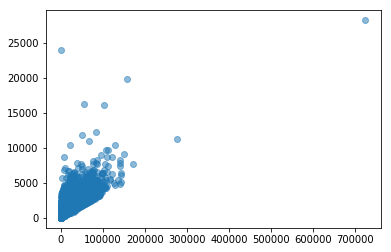

In [7]:
plt.scatter(ride_id["ride_distance"], ride_id["ride_duration"], alpha=0.5)

In [8]:
ride_id["ride_prime_time"]

0          50
1           0
2           0
3          25
4         100
5         100
6           0
7          25
8          75
9          50
10        100
11          0
12          0
13         25
14          0
15          0
16          0
17          0
18          0
19         25
20          0
21         25
22         25
23         25
24          0
25         25
26          0
27         25
28        100
29         50
         ... 
193472      0
193473      0
193474      0
193475      0
193476     25
193477     75
193478      0
193479     25
193480      0
193481     25
193482      0
193483    200
193484      0
193485      0
193486      5
193487      0
193488      0
193489     50
193490     25
193491     75
193492      0
193493     50
193494      0
193495     75
193496     25
193497      0
193498      0
193499      0
193500      0
193501    100
Name: ride_prime_time, Length: 193502, dtype: int64

Duration x Prime Time 

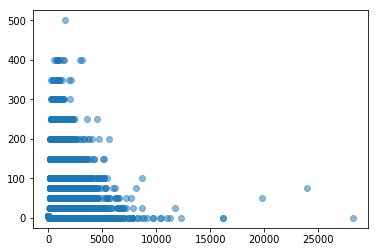

In [9]:
plt.scatter(ride_id.iloc[:,3], ride_id.iloc[:,4], alpha=0.5)

Migh tmake a driver/ride histogram to see the avg number of rides a driver does, should be normally distributed

In [10]:
ride_timestamps= pd.read_csv("ride_timestamps.csv")

In [11]:
ride_timestamps2 = ride_timestamps
a = ride_timestamps2[ride_timestamps2.index % 5== 0].reset_index()
b = ride_timestamps2[ride_timestamps2.index % 5 == 1].reset_index()
c = ride_timestamps2[ride_timestamps2.index % 5== 2].reset_index()
d = ride_timestamps2[ride_timestamps2.index % 5 == 3].reset_index()
e = ride_timestamps2[ride_timestamps2.index % 5== 4].reset_index()
ride_timestamps2 = ride_timestamps2[ride_timestamps2.index % 5 == 0]
s = pd.DataFrame(ride_timestamps2["ride_id"]).reset_index()
s["requested_at"] = a["timestamp"]
s["accepted_at"] = b["timestamp"]
s["arrived_at"] = c["timestamp"]
s["picked_up_at"] = d["timestamp"]
s["dropped_off_at"] = e["timestamp"]



In [12]:
s["time_waited"] = s["picked_up_at"].map(lambda a : datetime.strptime(a, "%Y-%m-%d %H:%M:%S")) - s["requested_at"].map(lambda a : datetime.strptime(a, "%Y-%m-%d %H:%M:%S"))
s["response_time"] =  s["accepted_at"].map(lambda a : datetime.strptime(a, "%Y-%m-%d %H:%M:%S")) - s["requested_at"].map(lambda a : datetime.strptime(a, "%Y-%m-%d %H:%M:%S"))

In [13]:
s["time_waited"] = s["time_waited"].apply(lambda a : a.seconds)
s["response_time"] = s["response_time"].apply(lambda a : a.seconds)

In [14]:
#df_merge_col = pd.merge(df_row, df3, on='id')
merge = pd.merge(ride_id, s[["ride_id", "time_waited", "response_time"]], on ="ride_id")

In [15]:
merge

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_cost,time_waited,response_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,6.243098,170,25
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.118740,192,3
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.192574,304,8
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,62.639041,171,4
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,9.708150,92,2
5,002be0ffdc997bd5c50703158b7c2491,03d6b9d80b8a96135cb9b25178e9e203,4832,917,100,10.565168,379,7
6,002be0ffdc997bd5c50703158b7c2491,04053c0ed21761e07f0b869cab5b7dd0,1575,347,0,6.147792,70,3
7,002be0ffdc997bd5c50703158b7c2491,0534d432e0186625f623aaee57af98be,3056,687,25,8.452746,65,3
8,002be0ffdc997bd5c50703158b7c2491,053a1621c0affcd2b9c517af5c2bc843,3940,1143,75,10.756432,710,31
9,002be0ffdc997bd5c50703158b7c2491,066e92c52f59486de56cd7b8716a4ca6,3957,868,50,9.760246,418,3


In [16]:
kmeans_data = merge[["ride_distance", "ride_duration", "ride_prime_time", "ride_cost", "time_waited", "response_time"]]

kmeans_data_no_out = kmeans_data[kmeans_data.ride_cost < 600]

In [17]:
kmeans_data_no_out = kmeans_data[kmeans_data.ride_cost < 600]

In [18]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(kmeans_data)

In [19]:
km.cluster_centers_

array([[5.16570691e+04, 2.87703104e+03, 1.22261108e+01, 5.12120492e+01,
        4.29359404e+02, 1.59936093e+01],
       [2.05548129e+04, 1.55003567e+03, 1.35603849e+01, 2.41214534e+01,
        3.47925431e+02, 1.42372526e+01],
       [4.19775374e+03, 7.30845352e+02, 1.80394501e+01, 9.42938310e+00,
        2.47779957e+02, 1.11531381e+01]])

Text(0.5, 0, 'Ride Cost')

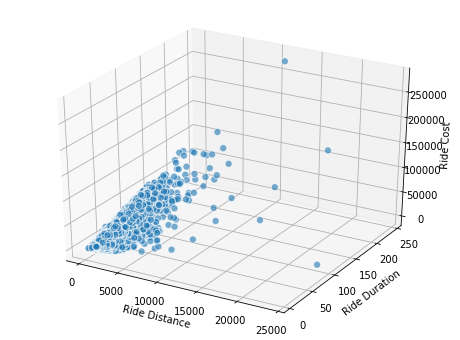

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

zs = kmeans_data_no_out['ride_distance']
xs = kmeans_data_no_out['ride_duration']
ys = kmeans_data_no_out['ride_cost']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Ride Distance')
ax.set_ylabel('Ride Duration')
ax.set_zlabel('Ride Cost')


In [21]:
cost_mean = kmeans_data_no_out['ride_cost'].median()
kmeans_data_no_out.loc[kmeans_data_no_out.ride_cost < cost_mean, 'ride_cost']  = 0
kmeans_data_no_out.loc[kmeans_data_no_out.ride_cost >= cost_mean, 'ride_cost']  = 1

/home/anishthite/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
kmeans_data_no_out

,ride_distance,ride_duration,ride_prime_time,ride_cost,time_waited,response_time
0,1811,327,50,0.0,170,25
1,3362,809,0,0.0,192,3
2,3282,572,0,0.0,304,8
3,65283,3338,25,1.0,171,4
4,4115,823,100,1.0,92,2
5,4832,917,100,1.0,379,7
6,1575,347,0,0.0,70,3
7,3056,687,25,0.0,65,3
8,3940,1143,75,1.0,710,31
9,3957,868,50,1.0,418,3


/home/anishthite/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


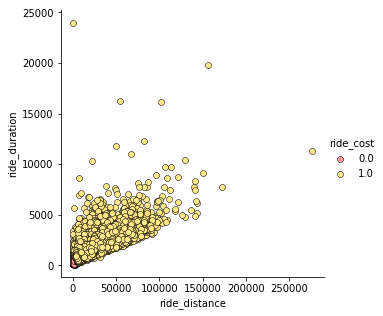

In [23]:
jp = sns.pairplot(kmeans_data_no_out, x_vars=["ride_distance"], y_vars=["ride_duration"], size=4.5,
                  hue="ride_cost", palette={0: "#FF9999", 1: "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

In [24]:
kmeans_corr = kmeans_data.corr()

In [25]:
kmeans_corr

,ride_distance,ride_duration,ride_prime_time,ride_cost,time_waited,response_time
ride_distance,1.000000,0.789315,-0.049251,0.987511,0.188675,0.035277
ride_duration,0.789315,1.000000,0.013309,0.876190,0.142242,0.032547
ride_prime_time,-0.049251,0.013309,1.000000,-0.035246,0.044350,0.012257
ride_cost,0.987511,0.876190,-0.035246,1.000000,0.184604,0.036043
time_waited,0.188675,0.142242,0.044350,0.184604,1.000000,0.259988
response_time,0.035277,0.032547,0.012257,0.036043,0.259988,1.000000


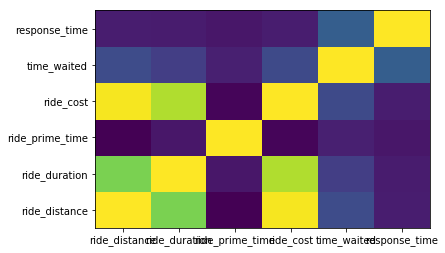

In [26]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt

plt.pcolor(kmeans_corr)
plt.yticks(np.arange(0.5, len(kmeans_corr.index), 1), kmeans_corr.index)
plt.xticks(np.arange(0.5, len(kmeans_corr.columns), 1), kmeans_corr.columns)
plt.show()

In [27]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(kmeans_data)

In [28]:
pca_data

array([[-5221.98670771,  -277.33306857],
       [-3648.61559705,   125.46269514],
       [-3739.92211273,  -108.43288065],
       ...,
       [-2969.31878999,   157.75053647],
       [-2254.8214467 ,    25.23692863],
       [-3256.24119895,   186.89835186]])

In [30]:
pca.explained_variance_ratio_

array([0.99789009, 0.00151917])

<Figure size 432x288 with 0 Axes>

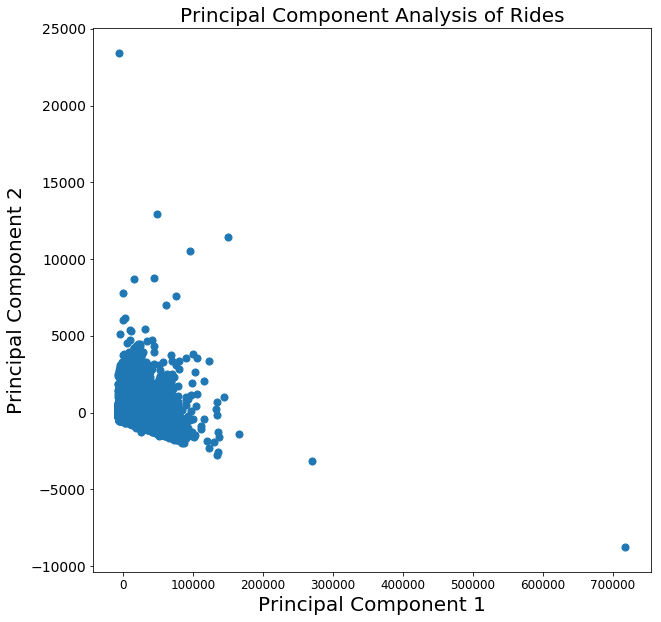

In [31]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Rides",fontsize=20)
plt.scatter(pca_data[:,0], pca_data[:, 1], s = 50)


In [35]:
pca_km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
pca_kmeans = km.fit(pca_data)

In [36]:
pca_kmeans.cluster_centers_

array([[-2.81890355e+03,  4.90916616e+00],
       [ 1.35466565e+04,  3.36032109e-01],
       [ 4.46615262e+04, -2.37285015e+02]])

In [38]:
pca_kmeans_predict = pca_kmeans.predict(pca_data)

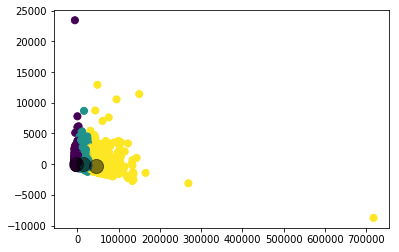

In [42]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=pca_kmeans_predict, s=50, cmap='viridis')
# plt.xlim([-100000,300000])
# plt.ylim([-5000,150000])
centers = pca_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

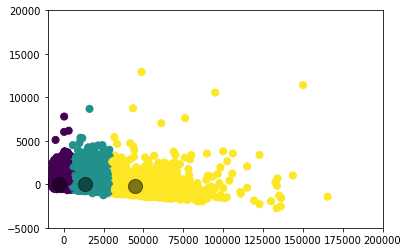

In [46]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=pca_kmeans_predict, s=50, cmap='viridis')
plt.xlim([-10000,200000])
plt.ylim([-5000,20000])
centers = pca_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
pca_1d = PCA(n_components=1)
pca_data_1d = pca.fit_transform(kmeans_data)

In [ ]:
pca_data_1d 

In [ ]:
pca.explained_variance_ratio_